In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from matplotlib import rcParams,font_manager
from matplotlib.ticker import FormatStrFormatter
import matplotlib.patches as patches
import matplotlib.colors as colors

import pickle
import pandas as pd

%load_ext autoreload
%autoreload 2

In [2]:
rcParams['figure.figsize'] = (6,6) #figure size in inches
rcParams['font.family'] = "sans-serif" 
rcParams['font.weight'] = "roman" 
rcParams['font.style'] = "normal" # not 100% sure what this does but it was recommended
rcParams['font.size'] = 32 # not 100% sure what this does but it was recommended
rcParams['pdf.fonttype'] = 42
rcParams['axes.linewidth'] = 2 #thickness of the border
rcParams['xtick.major.width'] = rcParams['axes.linewidth'] # make sure line widths are consistent
rcParams['ytick.major.width'] = rcParams['axes.linewidth']
rcParams['axes.spines.right'] = False #hides right border
rcParams['axes.spines.top'] = False #hides top
rcParams['legend.frameon'] = False #hides box around the legend
rcParams['legend.fontsize'] = 18 #font size in pt
rcParams['axes.labelsize'] = 32 
rcParams['xtick.labelsize'] = 24
rcParams['ytick.labelsize'] = rcParams['xtick.labelsize']
rcParams['lines.linewidth'] = 3
rcParams['xtick.major.size'] = 5
rcParams['lines.markersize'] = 16
rcParams['ytick.major.size'] = rcParams['xtick.major.size'] 

In [3]:
direc = 'G:/My Drive/Bas Games/'



In [4]:
def plot_board(i):

    cm = colors.LinearSegmentedColormap.from_list('gray_gold_map', [colors.to_rgb('darkgray'), 
                                                                    colors.to_rgb('gold')], N=100)
    fig = plt.figure(figsize=[9,4])
    ax = fig.add_subplot(111,aspect='equal')
    ax.vlines(np.arange(-0.5,9.5,1),-0.5,3.5,color='black')
    ax.hlines(np.arange(-0.5,4.5,1),-0.5,8.5,color='black')
    
    for p in range(36):
        if bp[i,p]>0:
            circ = patches.Circle((p%9,p//9),0.33,color="black",fill=True)
            circ = ax.add_patch(circ)
        if wp[i,p]>0:
            circ = patches.Circle((p%9,p//9),0.33,color="white",fill=True)
            circ = ax.add_patch(circ)
        if m[i,p]>0:
            circ = patches.Circle((p%9,p//9),0.33,color=c[i],fill=False)
            circ = ax.add_patch(circ)
        
    plt.imshow(np.zeros(shape=[4,9]), cmap=cm, 
               interpolation='nearest',origin='lower',vmin=0,vmax=0.2)
    ax.axis('off')
    fig.tight_layout()
    plt.show()

In [5]:
def load(name):
    with open(name) as f:
        data = f.read()
    data=data[data.find('{{{'):]
    data=data[:data.find('}}'):]
    data = data.replace('{','').replace(',\n','\n').replace('}','').replace('0x','').replace('ULL','').replace('BLACK','Black').replace('WHITE','White').split()
    data = [line.split(',') for line in data]
    df = pd.DataFrame(data,columns=['bp','wp','move','color','rt','id','group'])
    df = df[['bp','wp','color','move','group','rt','id']]
    df['bp']=df['bp'].apply(lambda x: int(x,16))
    df['wp']=df['wp'].apply(lambda x: int(x,16))
    df['move']=df['move'].apply(lambda x: int(x,16))
    return df

In [6]:
'{:036b}'.format(int('e',16))

'000000000000000000000000000000001110'

In [7]:
df1 = load(direc + 'Data/data_tai1.cpp')
df2 = load(direc + 'Data/data_tai2.cpp')
df2['id'] = (df2['id'].astype(int) + 50).astype(str)
df = pd.concat([df1,df2]).reset_index(drop=True)
df['id'] = df['id'].astype(int)
df['rt'] = df['rt'].astype(int)

In [8]:
df

,bp,wp,color,move,group,rt,id
0,0,0,Black,17179869184,2,1809,2
1,17179869184,4096,Black,8589934592,4,6974,2
2,25769803776,4128,Black,4294967296,2,3029,2
3,30064771072,2147487776,Black,34359738368,4,1439,2
4,32768,0,White,8388608,5,867,1
...,...,...,...,...,...,...,...
13253,0,0,Black,8388608,1,835,88
13254,8388608,64,Black,16384,1,919,88
13255,8404992,32832,Black,16777216,5,816,88
13256,25182208,33587264,Black,32,2,1465,88


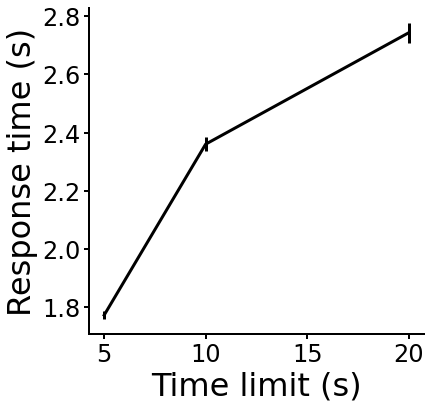

In [9]:
plt.errorbar(x=[5,10,20],y=[np.mean(df[df['id']%3==i]['rt']/1000) for i in [0,1,2]],
             yerr=[np.std(df[df['id']%3==i]['rt']/1000)/np.sqrt(np.sum(df['id']%3==i)) for i in [0,1,2]],
             color='black')
plt.xlabel('Time limit (s)')
plt.ylabel('Response time (s)')
plt.show()

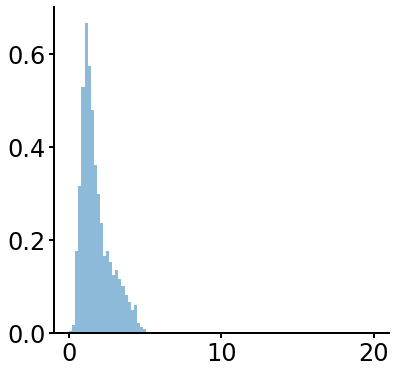

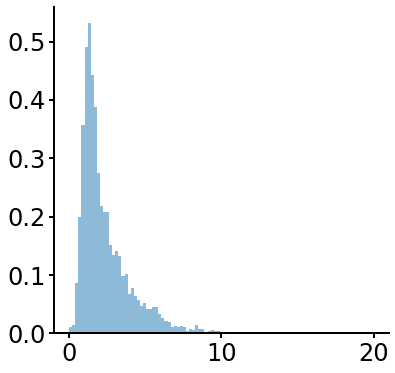

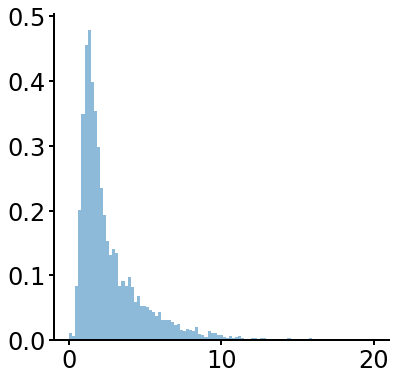

In [10]:
plt.hist(df[df['id']%3==0]['rt']/1000,alpha=0.5,density='normed',bins=np.linspace(0,20,100),label='5')
plt.show()

plt.hist(df[df['id']%3==1]['rt']/1000,alpha=0.5,density='normed',bins=np.linspace(0,20,100),label='10')
plt.show()

plt.hist(df[df['id']%3==2]['rt']/1000,alpha=0.5,density='normed',bins=np.linspace(0,20,100),label='20')
plt.show()

In [11]:
df_20s = df[df['id']%3==2].copy().reset_index(drop=True)

In [12]:
df_20s['id']=df_20s['id']//3

In [13]:
df_20s.to_csv(direc + 'Data/data_tai_20s.txt',header=None,index=False,sep='\t',line_terminator='\n')

In [14]:
df_20s

,bp,wp,color,move,group,rt,id
0,0,0,Black,17179869184,2,1809,0
1,17179869184,4096,Black,8589934592,4,6974,0
2,25769803776,4128,Black,4294967296,2,3029,0
3,30064771072,2147487776,Black,34359738368,4,1439,0
4,16384,0,White,4194304,1,3070,0
...,...,...,...,...,...,...,...
4684,37321462617,5393132578,White,131072,5,923,29
4685,37355017049,5393263650,White,65536,1,1634,29
4686,37355017053,5393329186,White,8589934592,1,1847,29
4687,37489234781,13983263778,White,67108864,4,1618,29


In [15]:
params = np.vstack([np.loadtxt(direc + 'Analysis/Params/params_tai1_final_nodelta.txt'),
                    np.loadtxt(direc + 'Analysis/Params/params_tai2_final_nodelta.txt')])

In [16]:
np.savetxt(direc + 'Analysis/Params/params_tai_20s_final_nodelta.txt',params[(np.arange(450)//5)%3==2,:])

In [17]:
fourinarows = np.array([[ 0,  9, 18, 27], #hard-coding all ways in which four-in-a-row can appear
                       [ 1, 10, 19, 28],
                       [ 2, 11, 20, 29],
                       [ 3, 12, 21, 30],
                       [ 4, 13, 22, 31],
                       [ 5, 14, 23, 32],
                       [ 6, 15, 24, 33],
                       [ 7, 16, 25, 34],
                       [ 8, 17, 26, 35],
                       [ 0, 10, 20, 30],
                       [ 1, 11, 21, 31],
                       [ 2, 12, 22, 32],
                       [ 3, 13, 23, 33],
                       [ 4, 14, 24, 34],
                       [ 5, 15, 25, 35],
                       [ 3, 11, 19, 27],
                       [ 4, 12, 20, 28],
                       [ 5, 13, 21, 29],
                       [ 6, 14, 22, 30],
                       [ 7, 15, 23, 31],
                       [ 8, 16, 24, 32],
                       [ 0,  1,  2,  3],
                       [ 1,  2,  3,  4],
                       [ 2,  3,  4,  5],
                       [ 3,  4,  5,  6],
                       [ 4,  5,  6,  7],
                       [ 5,  6,  7,  8],
                       [ 9, 10, 11, 12],
                       [10, 11, 12, 13],
                       [11, 12, 13, 14],
                       [12, 13, 14, 15],
                       [13, 14, 15, 16],
                       [14, 15, 16, 17],
                       [18, 19, 20, 21],
                       [19, 20, 21, 22],
                       [20, 21, 22, 23],
                       [21, 22, 23, 24],
                       [22, 23, 24, 25],
                       [23, 24, 25, 26],
                       [27, 28, 29, 30],
                       [28, 29, 30, 31],
                       [29, 30, 31, 32],
                       [30, 31, 32, 33],
                       [31, 32, 33, 34],
                       [32, 33, 34, 35]],dtype=int)

In [18]:
bp = np.vstack(df['bp'].apply(lambda n: [int(x) for x in '{:036b}'.format(n)]))
wp = np.vstack(df['wp'].apply(lambda n: [int(x) for x in '{:036b}'.format(n)]))
human_move = df['move'].apply(lambda x: 35-(len(bin(x))-3))
m = (np.tile(human_move,[36,1]).T==np.tile(np.arange(36),[len(human_move),1])).astype(int)
black_threats = np.sum(bp[:,fourinarows],axis=2)
white_threats = np.sum(wp[:,fourinarows],axis=2)
black_wins = np.sum(np.sum((bp+m)[:,fourinarows],axis=2)==4,axis=1)>0
white_wins = np.sum(np.sum((wp+m)[:,fourinarows],axis=2)==4,axis=1)>0
c = df['color'].values

In [19]:
successful_wins = np.logical_or(np.logical_and(df['color']=='Black',black_wins),
                                np.logical_and(df['color']=='White',white_wins))
                    
unsuccessful_wins = np.logical_or(np.logical_and.reduce([df['color']=='Black',
                             ~black_wins,                            
                             np.sum(np.logical_and(black_threats==3,white_threats==0),axis=1)>0]),
                    np.logical_and.reduce([df['color']=='White',
                             ~white_wins,
                             np.sum(np.logical_and(white_threats==3,black_threats==0),axis=1)>0]))

In [20]:
successful_blocks = np.logical_or(np.logical_and.reduce([df['color']=='Black',
                             white_wins,                            
                             np.sum(np.logical_and(white_threats==3,black_threats==0),axis=1)==1,
                             np.sum(np.logical_and(black_threats==3,white_threats==0),axis=1)==0]),
                    np.logical_and.reduce([df['color']=='White',
                             black_wins,
                             np.sum(np.logical_and(white_threats==3,black_threats==0),axis=1)==0,
                             np.sum(np.logical_and(black_threats==3,white_threats==0),axis=1)==1]))
                    
unsuccessful_blocks = np.logical_or(np.logical_and.reduce([df['color']=='Black',
                             ~white_wins,                            
                             np.sum(np.logical_and(white_threats==3,black_threats==0),axis=1)==1,
                             np.sum(np.logical_and(black_threats==3,white_threats==0),axis=1)==0]),
                    np.logical_and.reduce([df['color']=='White',
                             ~black_wins,
                             np.sum(np.logical_and(white_threats==3,black_threats==0),axis=1)==0,
                             np.sum(np.logical_and(black_threats==3,white_threats==0),axis=1)==1]))
                    

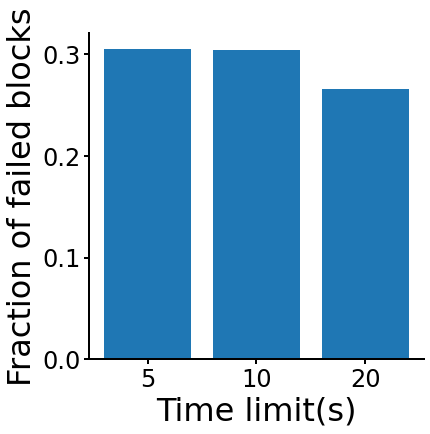

In [21]:
_,successful_block_counts = np.unique(df[successful_blocks]['id']%3,return_counts=True)
_,unsuccessful_block_counts = np.unique(df[unsuccessful_blocks]['id']%3,return_counts=True)


plt.bar(x=[0,1,2],height=unsuccessful_block_counts/(successful_block_counts+unsuccessful_block_counts))
plt.xticks([0,1,2],[5,10,20])
plt.ylabel('Fraction of failed blocks')
plt.xlabel('Time limit(s)')
plt.show()

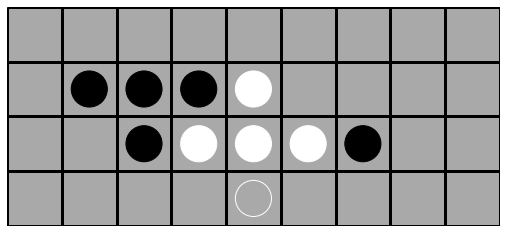

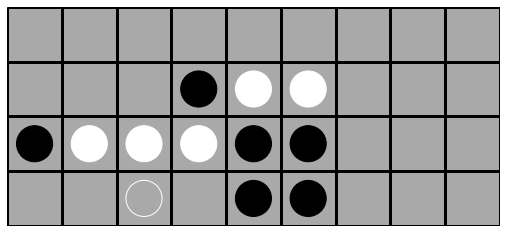

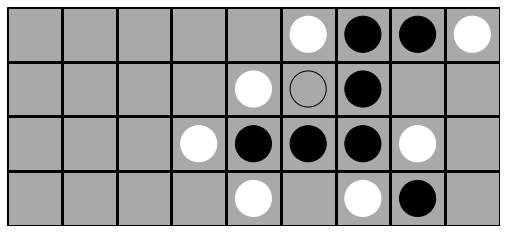

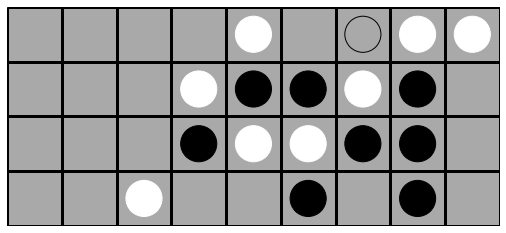

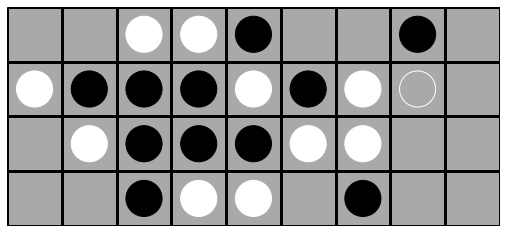

In [22]:
for i in np.nonzero(unsuccessful_blocks)[0][:5]:
    plot_board(i)

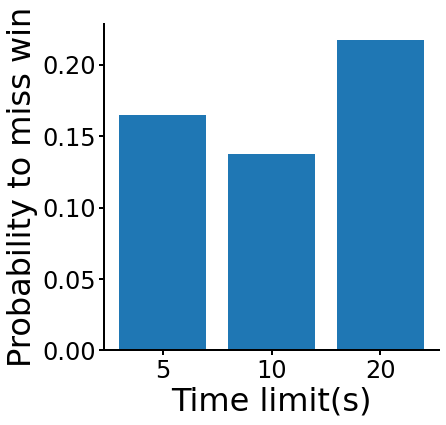

In [513]:
_,successful_win_counts = np.unique(df[successful_wins]['id']%3,return_counts=True)
_,unsuccessful_win_counts = np.unique(df[unsuccessful_wins]['id']%3,return_counts=True)

plt.bar(x=[0,1,2],height=unsuccessful_win_counts/(successful_win_counts+unsuccessful_win_counts))
plt.xticks([0,1,2],[5,10,20])
plt.ylabel('Probability to miss win')
plt.xlabel('Time limit(s)')
plt.show()

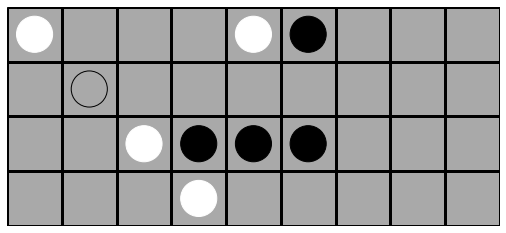

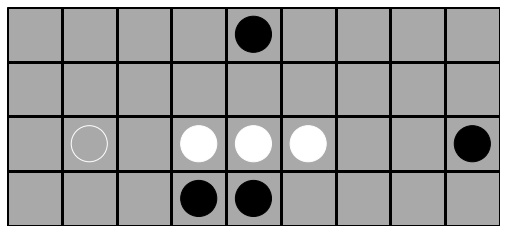

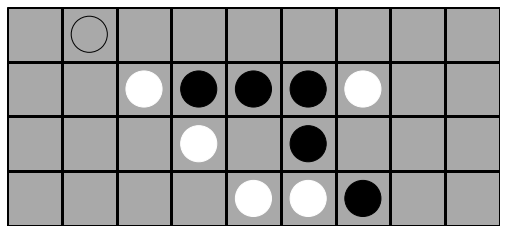

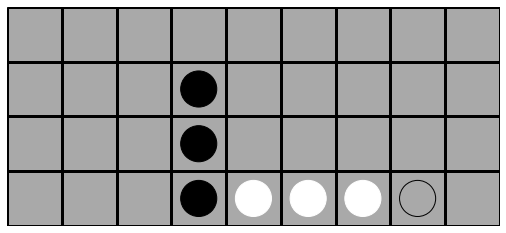

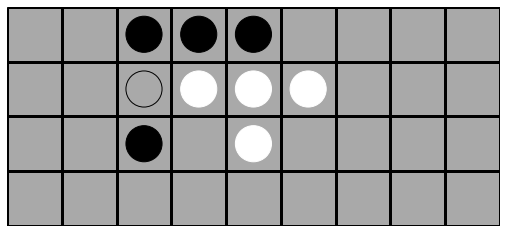

In [465]:
for i in np.nonzero(unsuccessful_wins)[0][:5]:
    plot_board(i)

In [466]:
model_moves_main = np.array([[np.loadtxt(direc + 'Analysis/Model prediction/model_prediction_tai_20s/model_prediction_tai_20s_final_' + str(i) + '_' + str(g) + '.txt',dtype=int) 
                              for i in range(30)] for g in range(1,6)])

In [467]:
model_moves_nodrop = np.array([[np.loadtxt(direc + 'Analysis/Model prediction/model_prediction_tai_20s/model_prediction_tai_20s_final_nodelta_' + str(i) + '_' + str(g) + '.txt',dtype=int) 
                              for i in range(30)] for g in range(1,6)])

In [505]:
m_main = np.reshape(np.transpose(model_moves_main,(2,0,1,3)),[len(df_20s),-1,40])
m_nodrop = np.reshape(np.transpose(model_moves_nodrop,(2,0,1,3)),[len(df_20s),-1,40])
h_main = np.apply_along_axis(lambda arr: np.bincount(arr,minlength=36)/len(arr),1,m_main) 
h_nodrop = np.apply_along_axis(lambda arr: np.bincount(arr,minlength=36)/len(arr),1,m_nodrop)
human_move_20s = human_move[df['id']%3==2]

x_nodrop = np.mean(h_main[np.arange(4689),human_move_20s],axis=1)/np.mean(h_nodrop[np.arange(4689),human_move_20s],axis=1)

In [506]:
len(bp)

13258

In [507]:
def plot_example_boards(ind,x,h_alt,alt_title,main_title,fig_name,show_human=True,prefix='JS = ',vmax=0.5):

    cm = colors.LinearSegmentedColormap.from_list('gray_red_map', [colors.to_rgb('darkgray'), 
                                                                colors.to_rgb('red')], N=100)    
    fig,axes=plt.subplots(len(ind),2,figsize=(12,3*len(ind)))

    for i,j in enumerate(ind):

        for ax,h in zip(axes[i],[np.mean(h_alt,axis=2),np.mean(h_main,axis=2)]):

            ax.vlines(np.arange(-0.5,9.5,1),-0.5,3.5,color='black')
            ax.hlines(np.arange(-0.5,4.5,1),-0.5,8.5,color='black')
            ax.set_xticks([])
            ax.set_yticks([])
            #ax.axis('off')


            for p in range(36):
                if bp[df['id']%3==2][j,p]>0:
                    circ = patches.Circle((p%9,p//9),0.33,color="black",fill=True)
                    circ = ax.add_patch(circ)
                if wp[df['id']%3==2][j,p]>0:
                    circ = patches.Circle((p%9,p//9),0.33,color="white",fill=True)
                    circ = ax.add_patch(circ)
                if m[df['id']%3==2][j,p]>0:
                    if show_human:
                        circ = patches.Circle((p%9,p//9),0.33,color=c[df['id']%3==2][j],linewidth=4,fill=False)
                        circ = ax.add_patch(circ)
                            
            k=np.argmax(h[j])
            ax.text(s='x',x=k%9,y=k//9,ha='center',va='center',fontsize=24,color=c[df['id']%3==2][j])

            ax.imshow(np.reshape(h[j],[4,9]),
                       cmap=cm,interpolation='nearest',origin='lower',vmin=0,vmax=vmax)

    axes[0,0].set_title(alt_title,fontsize=30)
    axes[0,1].set_title(main_title,fontsize=30)
    for i,j in enumerate(ind):
        axes[i,0].set_ylabel(prefix + '{:.3}'.format(x[j]),fontsize=24)

    
    fig.tight_layout()
    #fig.savefig(fig_direc + fig_name)
    plt.show()

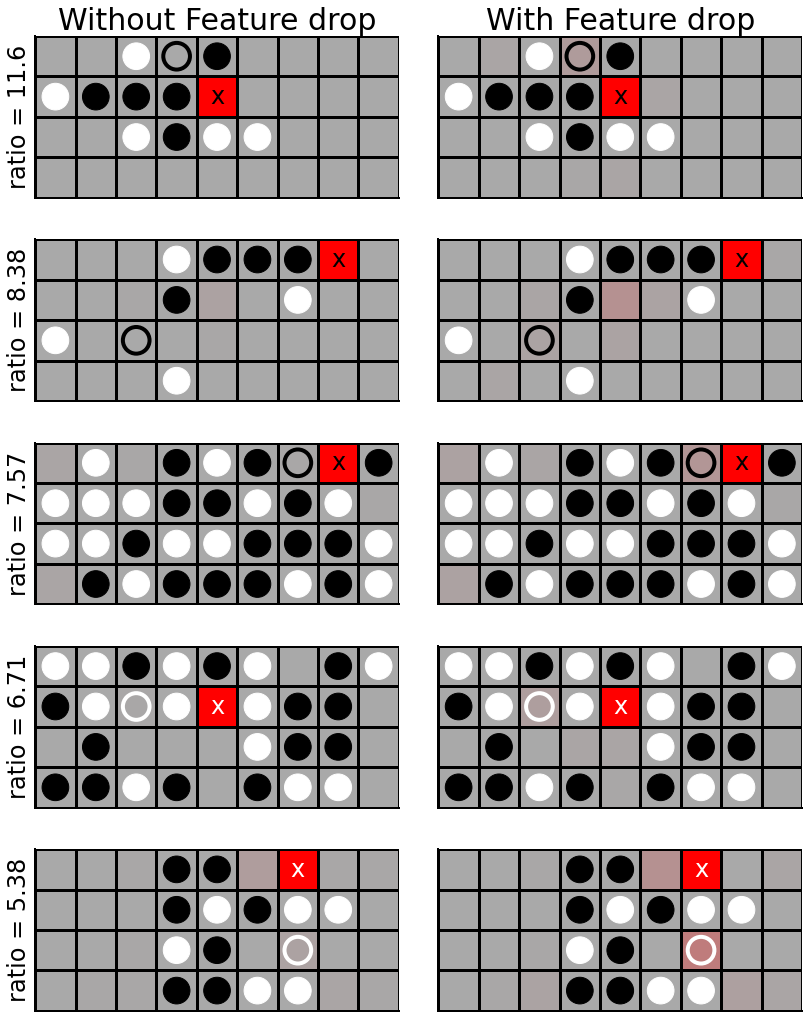

In [510]:
plot_example_boards((np.argsort(x_nodrop)[::-1])[[1,2,3,5,6]],x_nodrop,
                    h_nodrop,'Without Feature drop','With Feature drop','supp_fig_6_rev.pdf',True,prefix='ratio = ',vmax=0.5)